# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import tensorflow as tf
# Disable GPU
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(
    input_shape, 
    output_units = 10, 
    num_neurons = [512, 256, 128]):
    
    
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=10, activation='softmax', name = 'output')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
learning_rate = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
epochs        = 50
batch_size    = 256
momentum      = 0.95

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in learning_rate:
#for moment in momentum:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs = epochs, 
              batch_size = batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



W0719 16:55:23.221178 13188 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 16:55:23.224172 13188 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 16:55:23.227162 13188 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 16:55:23.228161 13188 deprecation_wrapper.py:119] From c:\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 16:55:23.232155 13188 deprecation_wrapper.py:119] From c:\python36\lib\sit

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.4398 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 50us/step - loss: 2.3419 - acc: 0.2088 - val_loss: 1.9347 - val_acc: 0.2984
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8810 - acc: 0.3200 - val_loss: 1.8344 - val_acc: 0.3374
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7817 - acc: 0.3580 - val_loss: 1.8494 - val_acc: 0.3338
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7126 - acc: 0.3883 - val_loss: 1.7726 - val_acc: 0.3614
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6617 - acc: 0.4041 - val_loss: 1.7810 - val_acc: 0.3640
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6129 - acc: 0.4225 - val_loss: 1.6814 - val_acc: 0.4059
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5743 - acc: 0.4364 - val_loss: 1.6309 - val_acc: 0.4136
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.7046 - acc: 0.3947 - val_loss: 1.7102 - val_acc: 0.3826
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6507 - acc: 0.4175 - val_loss: 1.7531 - val_acc: 0.3706
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6119 - acc: 0.4269 - val_loss: 1.6114 - val_acc: 0.4229
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5721 - acc: 0.4435 - val_loss: 1.5569 - val_acc: 0.4486
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5417 - acc: 0.4560 - val_loss: 1.6147 - val_acc: 0.4123
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5147 - acc: 0.4651 - val_loss: 1.6392 - val_acc: 0.4150
Epoch 9/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.4897 - acc: 0.4765 - val_loss: 1.5285 - val_acc: 0.4524
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 44us/step - loss: 1.8378 - acc: 0.3632 - val_loss: 1.8297 - val_acc: 0.3643
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8020 - acc: 0.3751 - val_loss: 1.7928 - val_acc: 0.3758
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7742 - acc: 0.3853 - val_loss: 1.7684 - val_acc: 0.3864
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7504 - acc: 0.3935 - val_loss: 1.7481 - val_acc: 0.3890
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7296 - acc: 0.3991 - val_loss: 1.7266 - val_acc: 0.3980
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7109 - acc: 0.4060 - val_loss: 1.7134 - val_acc: 0.4083
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6944 - acc: 0.4104 - val_loss: 1.6977 - val_acc: 0.4117
Epoch 11/50
50000/50000 [==========================

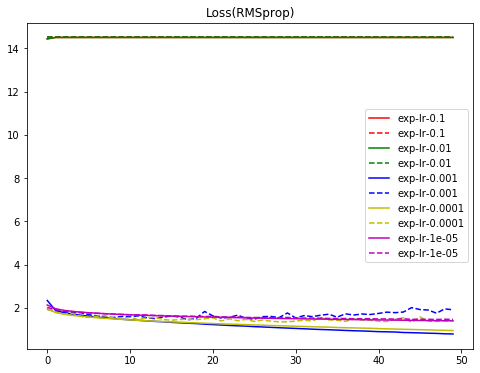

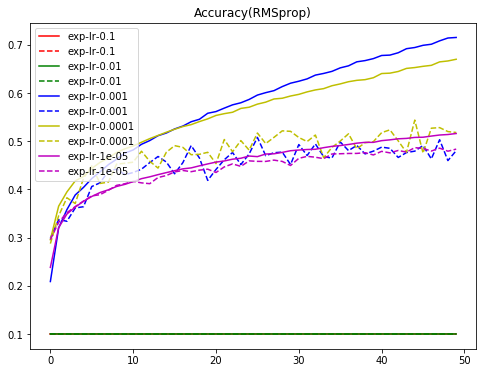

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(RMSprop)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(RMSprop)")
plt.legend()
plt.show()